# ECE 143 Final Project: Group 19
## Smoker Status Analysis using Bio-Signals

Team members:
* [Pin-Ying Wu](piw005@ucsd.edu)
* [Unay Shah](uvshah@ucsd.edu)
* [Zhiyang Zhang](zhz149@ucsd.edu)
* [Zoom Chow](zchow@ucsd.edu)

### Problem Statement

Smoking has been extensively demonstrated to have detrimental effects on health across various dimensions.As of 2018, it stands as the primary contributor to avoidable illness and death worldwide, persistently undermining global health.

While evidence-based treatments for smoking cessation have been advocated and promoted, fewer than one-third of participants managed to attain abstinence. Many physicians perceive counseling for smoking cessation as ineffective and time-consuming, leading them to omit it from their daily practice routine.

Thus, there comes an urgent need for physicians to have a method to identify smokers who had a better chance of quitting. Our proposed solution is to mathematically analyze all the factors in datasets and find top-influential bio-signals to identify smoker and non-smoker.

### Dataset
[Smoking Dataset from Kaggle](https://www.kaggle.com/competitions/playground-series-s3e24)

The dataset, consisting of both train and test data sets, is provided by Kaggle.

The entire dataset consists of two csv files, each of which contains over 23 bio-signal features of patients, namely Age, Height(cm), Weight(kg), Waist(cm), Eyesight(left), Eyesight(right), Hearing(left), Hearing(right), Systolic, Relaxation, Fasting blood sugar, Cholesterol, Triglyceride, HDL, LDL, Hemoglobin, Urine protein, Serum creatinine, AST, ALT, Gtp, and Dental caries. Only the training set contains the target prediction: "smoking status". For this project, since our pursuits focus on the data analysis, visualization, and inference rather than using ML algorithms, we will only use the training data.

In this project, we mainly use Pandas package to operate on datasets and seaborn and matplotlib to build visualizations.

### Imports and Loading Data

In [1]:
import numpy as np
import pandas as pd
from math import ceil

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import build_graphs as bg
import data_processing as dp

%load_ext autoreload
%autoreload 2

Loading data

In [2]:
# Loading the dataset
directory = 'playground-series-s3e24/'
train_file = directory + 'train.csv'
test_file = directory + 'test.csv'
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

print(
    f'Dataset features:\n\tShape: {train_df.shape}\n\n\tColumns: {list(train_df.columns)}')

# Separating smokers and non-smokers
smokers = train_df[train_df['smoking'] == 1]
non_smokers = train_df[train_df['smoking'] == 0]

Dataset features:
	Shape: (159256, 24)

	Columns: ['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


Visualizing the raw data and how the dataset is organized

In [3]:
train_df.head(10)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

Checking unique values in the dataset

In [5]:
train_df.nunique()

id                     159256
age                        18
height(cm)                 14
weight(kg)                 28
waist(cm)                 531
eyesight(left)             20
eyesight(right)            17
hearing(left)               2
hearing(right)              2
systolic                  112
relaxation                 75
fasting blood sugar       229
Cholesterol               227
triglyceride              392
HDL                       108
LDL                       222
hemoglobin                134
Urine protein               6
serum creatinine           28
AST                       140
ALT                       188
Gtp                       362
dental caries               2
smoking                     2
dtype: int64

### Data Preprocessing
Dropping NaN and duplicate values

In [6]:
train_df = dp.df_clean(train_df)

Count of NaN elements in each column of dataframe:
id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64 

Count of duplicate rows in dataframe:
0


Adding columns for BMI, Eyesight, Total cholestrol

In [7]:
smokers, non_smokers, train_df = dp.add_columns(
    [smokers, non_smokers, train_df], dp.calculate_bmi, 'bmi')
smokers, non_smokers, train_df = dp.add_columns(
    [smokers, non_smokers, train_df], dp.calculate_eyesight, 'eyesight')
smokers, non_smokers, train_df = dp.add_columns(
    [smokers, non_smokers, train_df], dp.calculate_total_cholestrol, 'total_cholesterol')

### Data Visualization

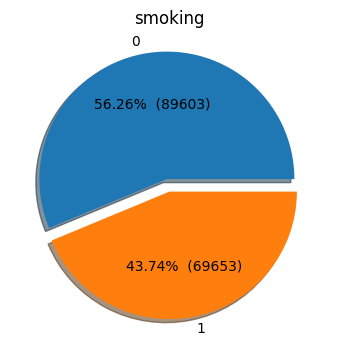

In [8]:
bg.build_pie_chart(train_df['smoking'],
                   custom_autopct_function=bg.custom_autopct)

#### Correlation Heatmap

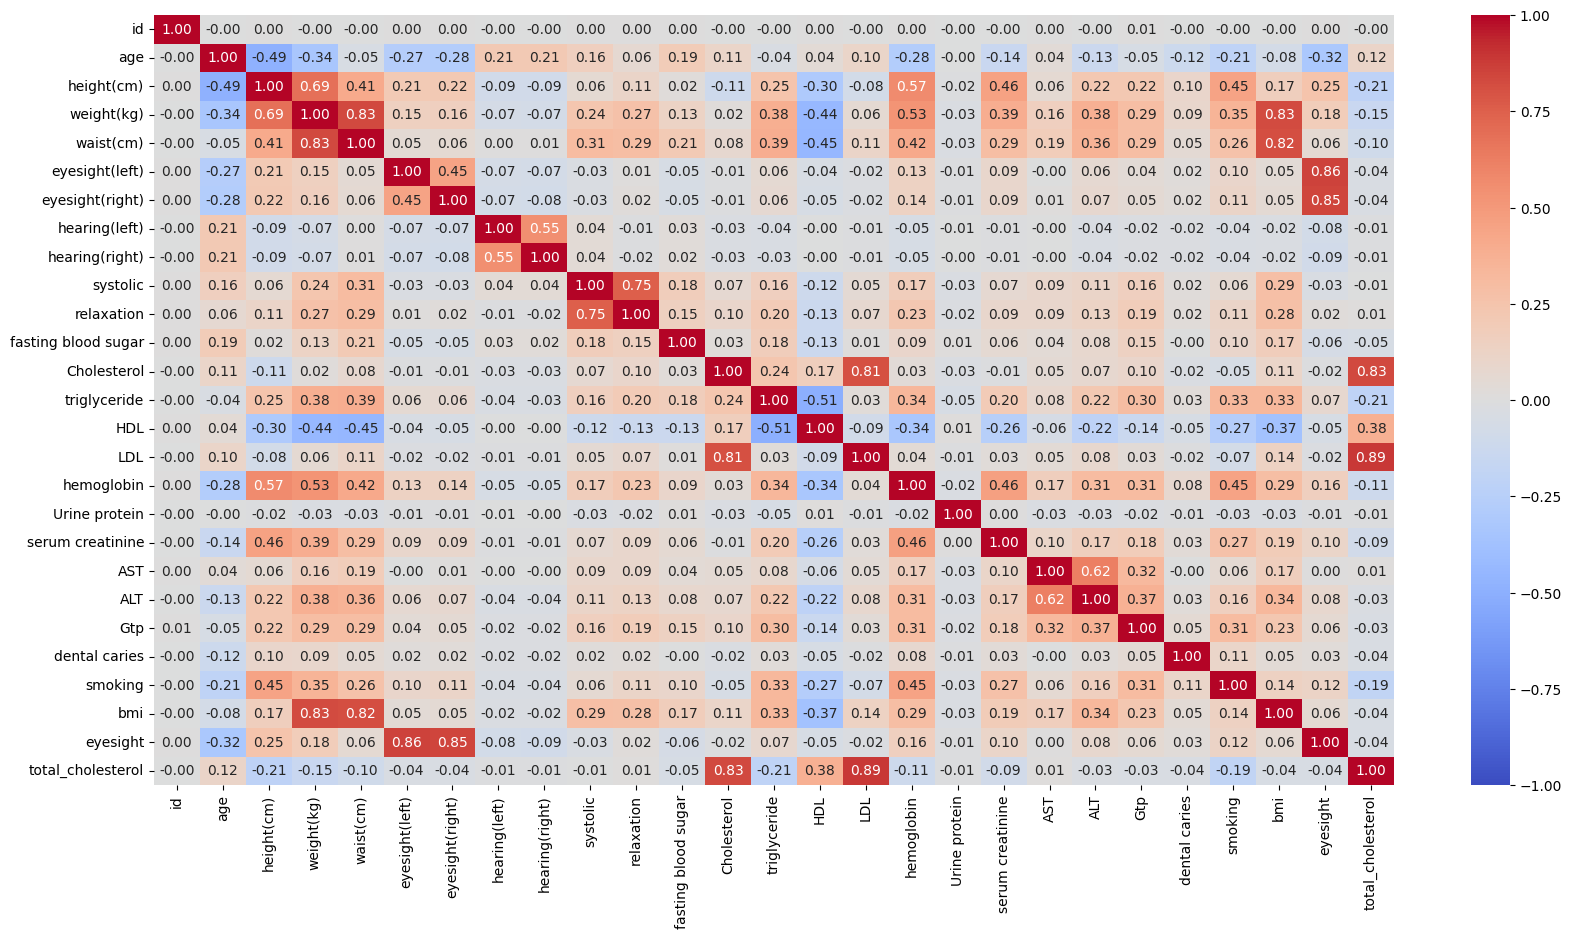

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f',
            vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.show()

#### Separating Features by Type: Numerical, Categorical, Target

In [10]:
numerical_features = ['age', 'height(cm)', 'weight(kg)', 'bmi', 'waist(cm)', 'eyesight',
                      'systolic', 'relaxation', 'fasting blood sugar',
                      'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'total_cholesterol', 'hemoglobin',
                      'serum creatinine', 'AST', 'ALT', 'Gtp']

categorical_features = [
    'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']
target = 'smoking'

#### Plots

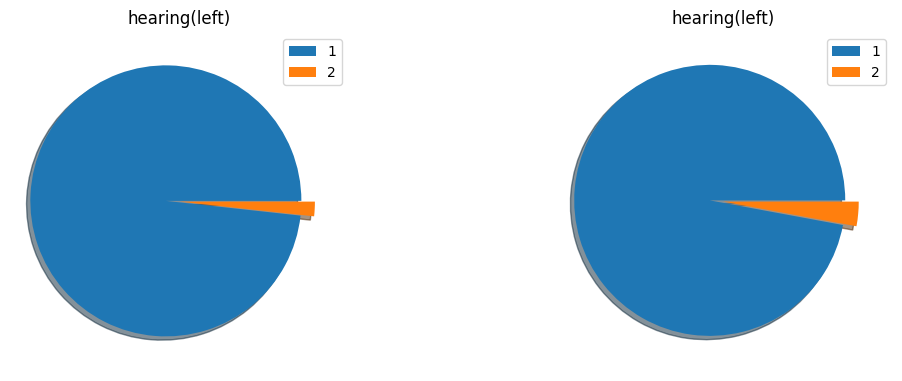

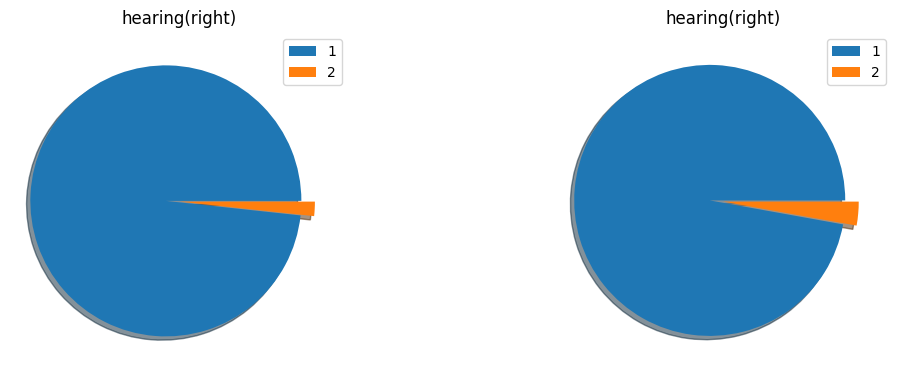

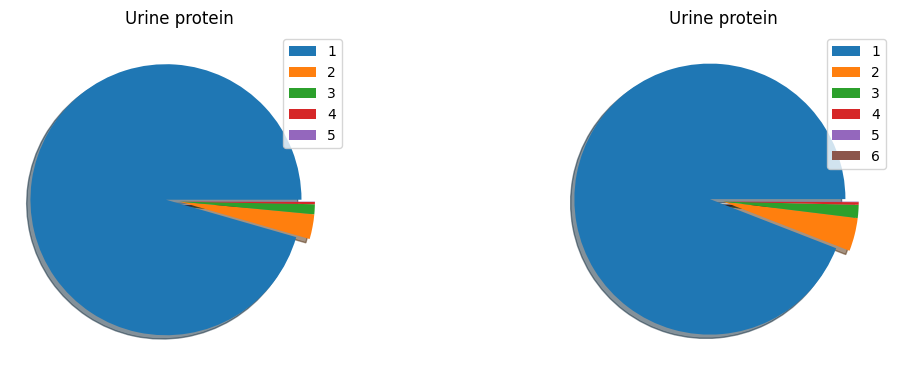

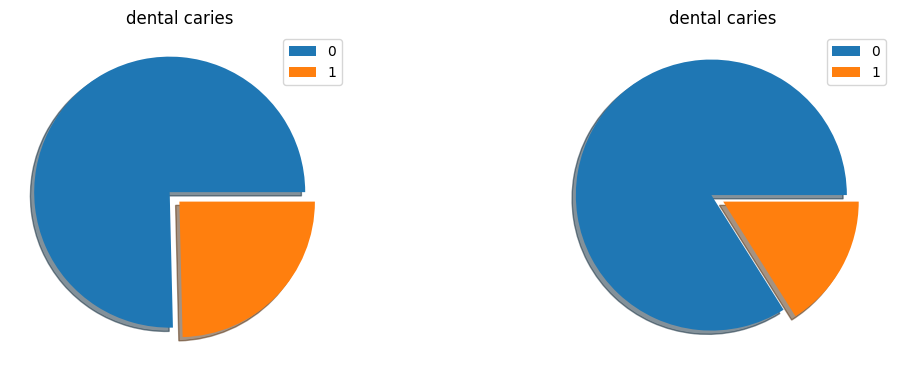

In [11]:
for features in categorical_features:
    bg.compare_pie(smokers, non_smokers, features)

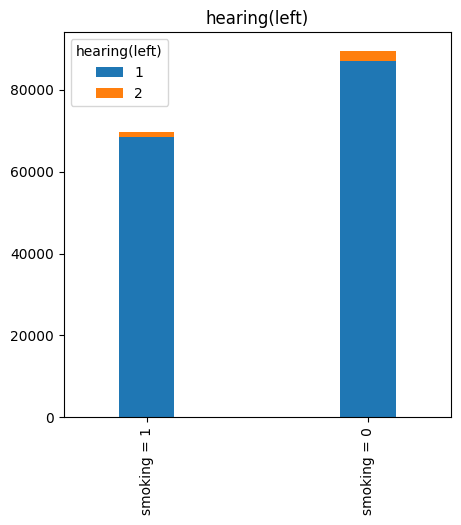

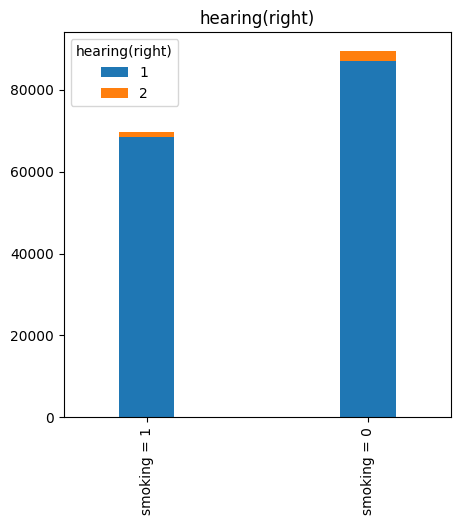

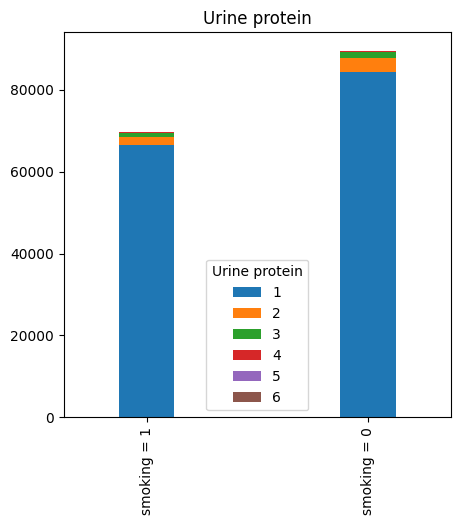

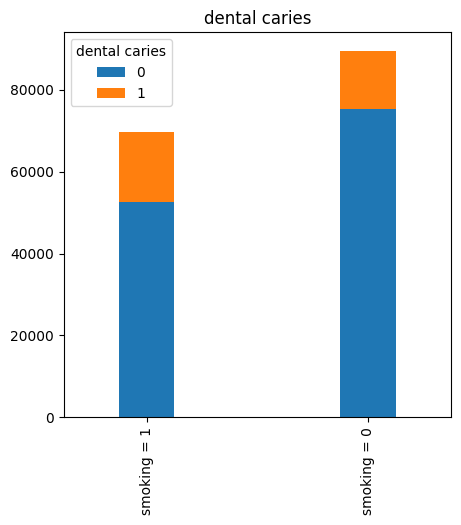

In [12]:
for feature in categorical_features:
    bg.build_bar_graph(train_df, target, feature)

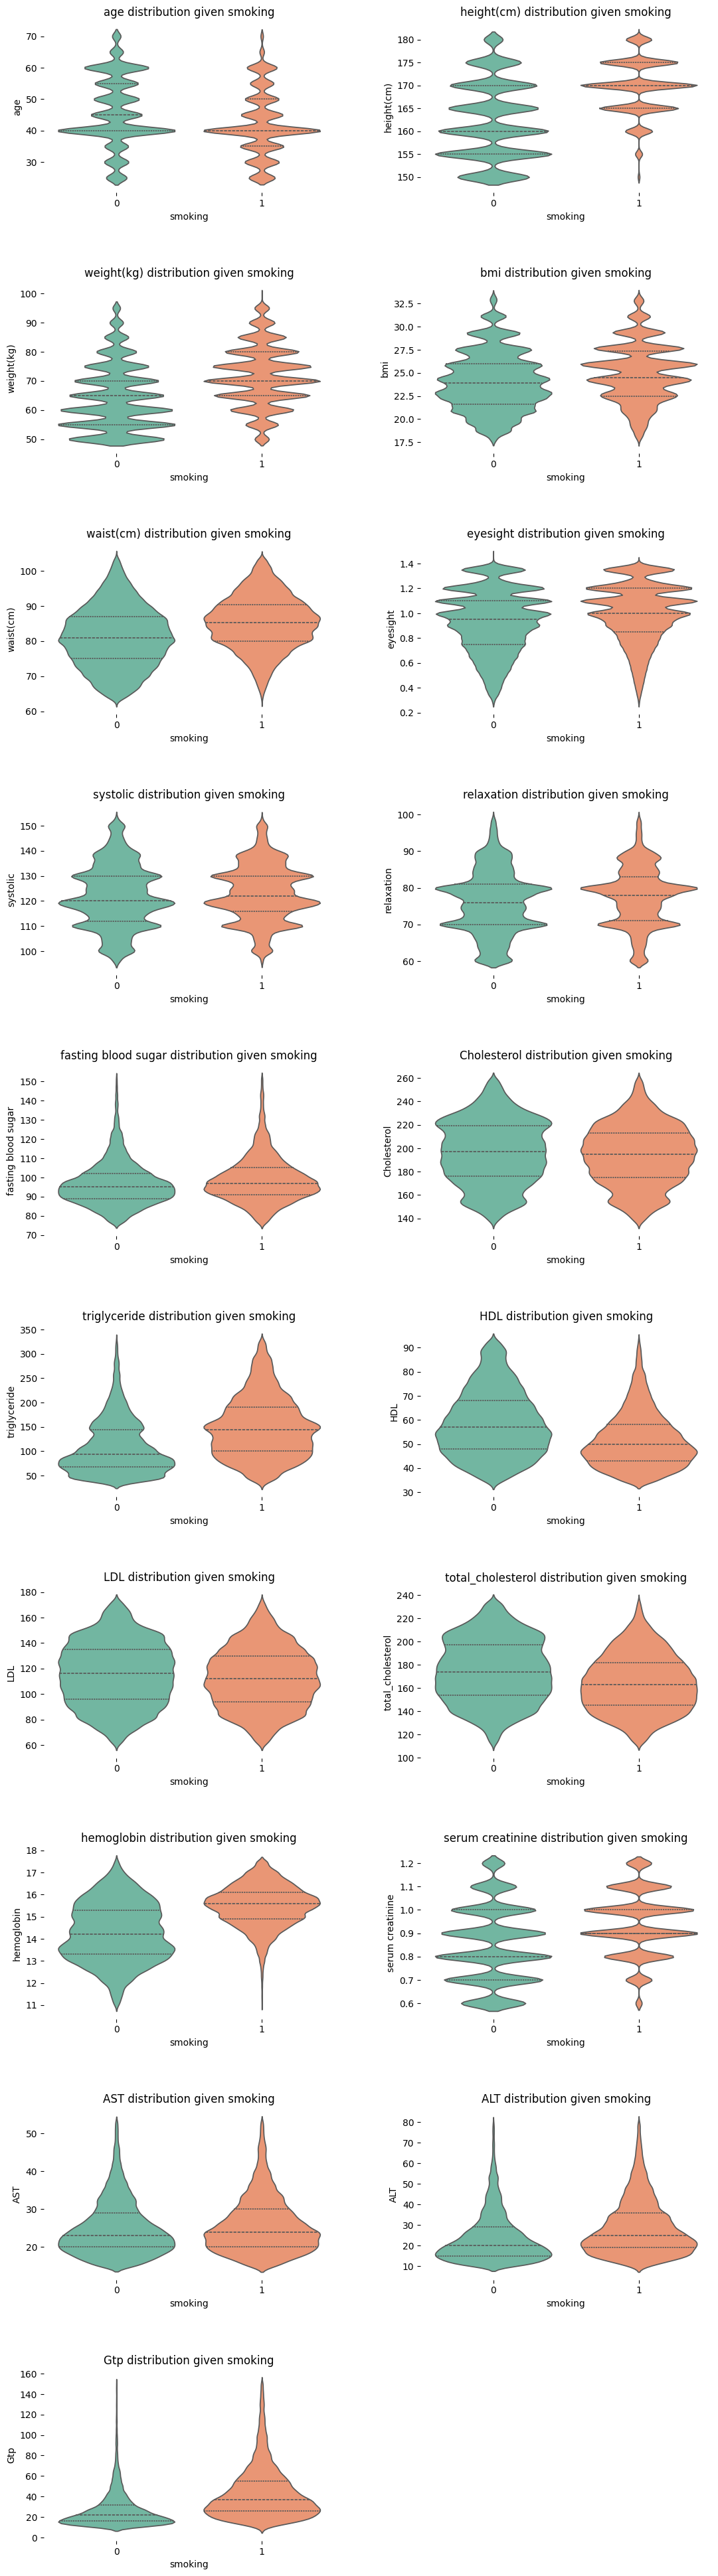

In [13]:
plt.figure(figsize=(12, 40))
for i, feature in enumerate(numerical_features):
    plt.subplot(ceil(len(numerical_features)/2), 2, i+1)
    bg.build_violin_graph(train_df, target, feature, True)

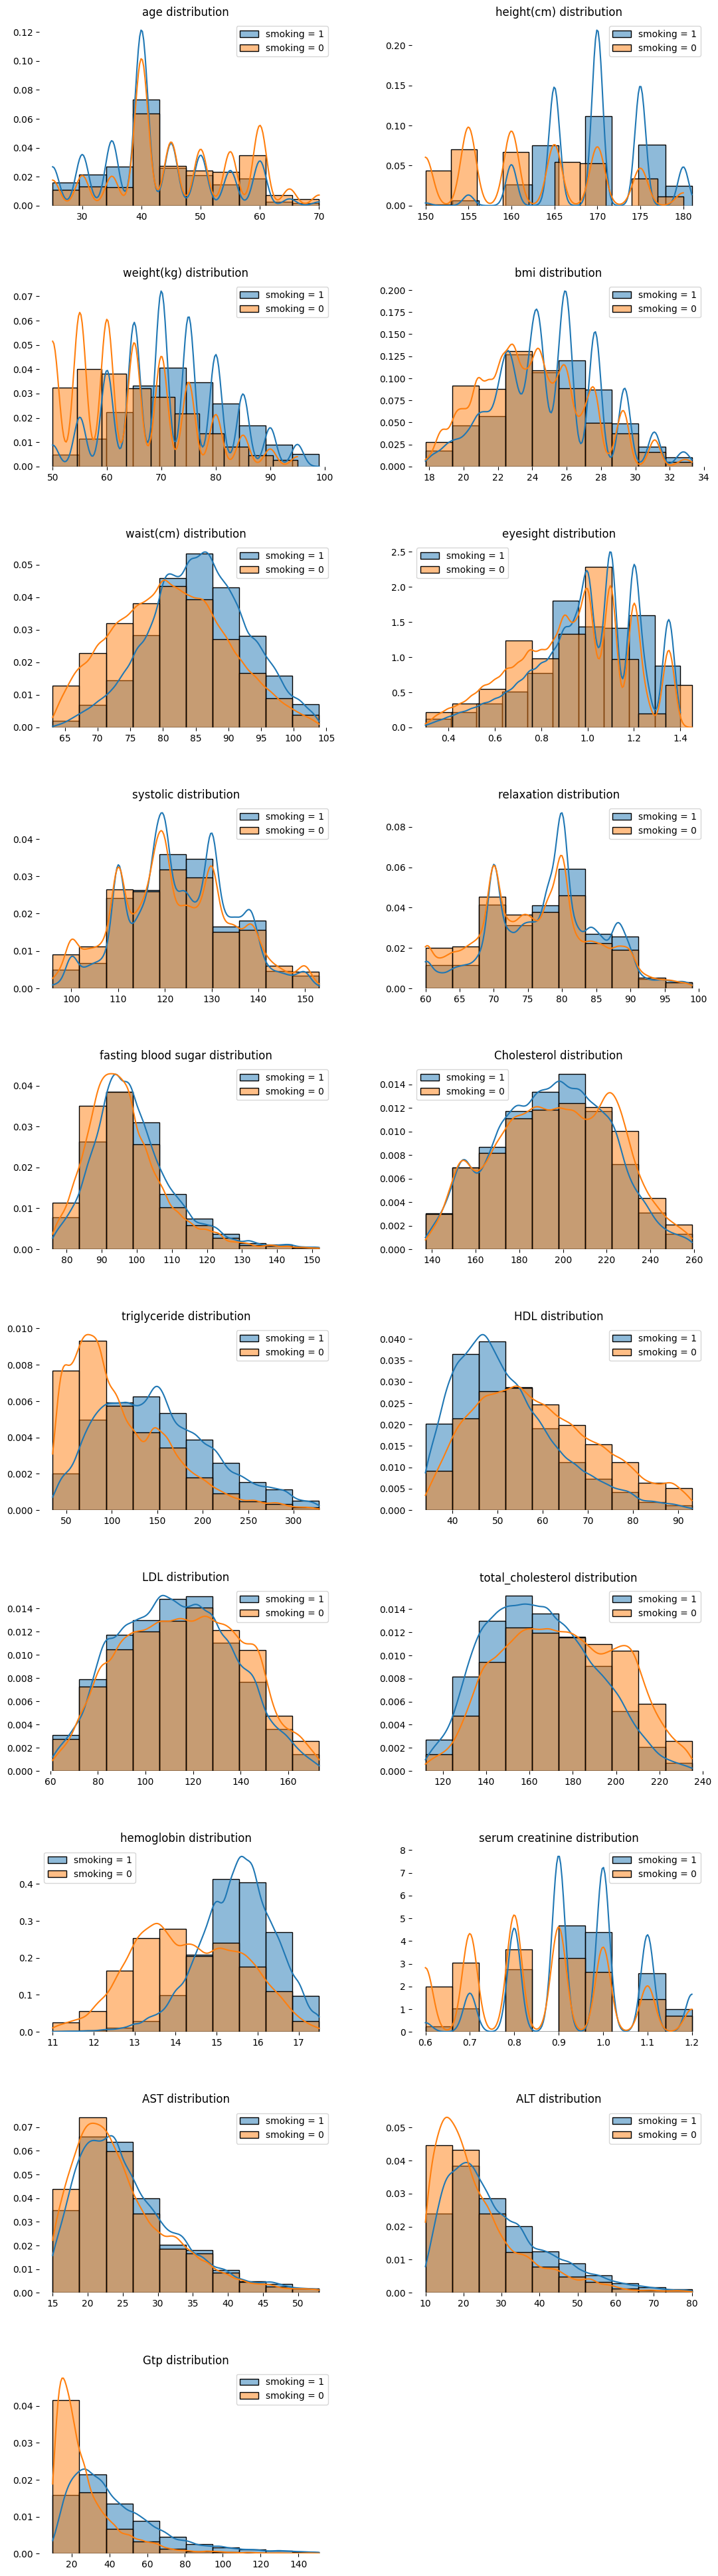

In [14]:
plt.figure(figsize=(12, 40))
for i, feature in enumerate(numerical_features):
    plt.subplot(ceil(len(numerical_features)/2), 2, i+1)
    bg.build_KDE_graph(train_df, target, feature, True)

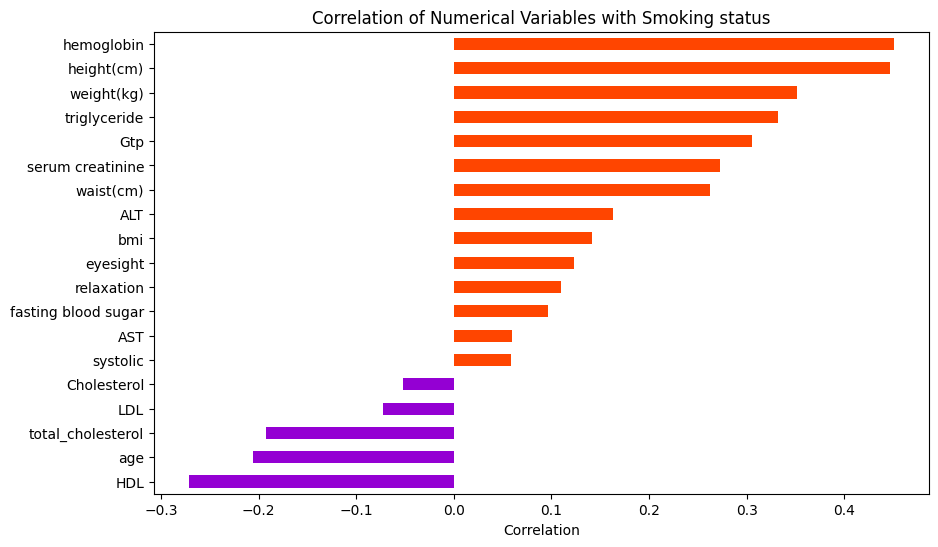

In [15]:
bg.numerical_correlation(
    train_df[numerical_features].corrwith(train_df[target]))

### Individual Features

##### BMI

In [16]:
mean_bmi_smokers = smokers['bmi'].mean()
mean_bmi_non_smokers = non_smokers['bmi'].mean()

t_statistic, p_value = stats.ttest_ind(smokers['bmi'], non_smokers['bmi'])

print("Mean BMI for smokers:", mean_bmi_smokers)
print("Mean BMI for non-smokers:", mean_bmi_non_smokers)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Mean BMI for smokers: 24.994311574818852
Mean BMI for non-smokers: 24.031899793368492
t-statistic: 57.13375274569558
p-value: 0.0


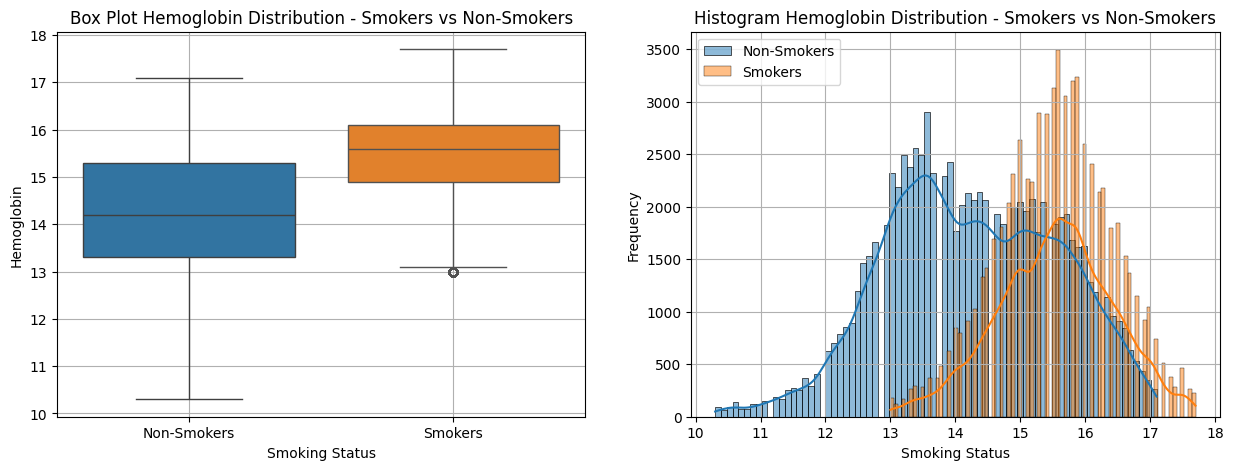

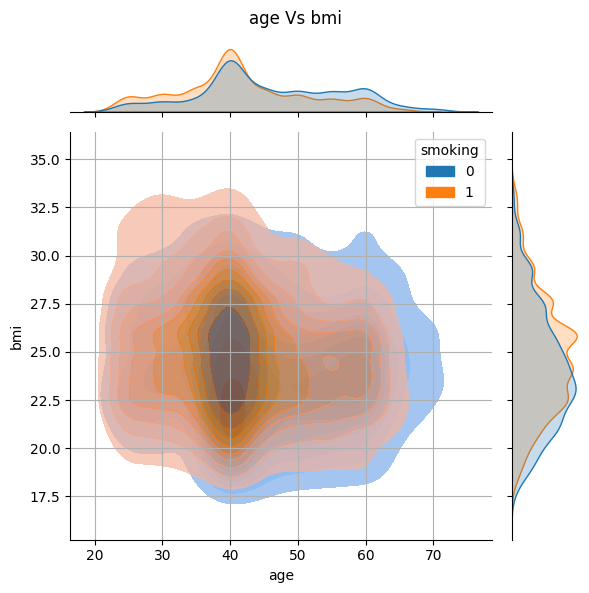

In [17]:
bg.single_feature_plot(non_smokers, smokers, 'smoking', 'hemoglobin', 'Hemoglobin Distribution - Smokers vs Non-Smokers',
                    'Smoking Status', 'Hemoglobin', [0, 1], ['Non-Smokers', 'Smokers'], True, 0.01, 0.99)
bg.joint_plots(smokers, non_smokers, 'age',
                        'bmi', 'smoking', 5000, True, 0.01, 0.99)

##### Age

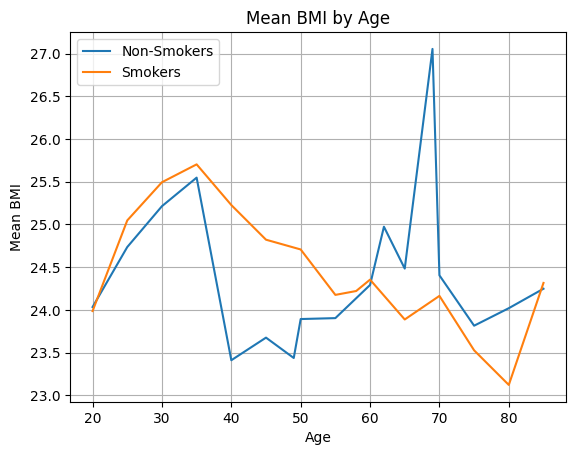

In [18]:
# group data by age and calculate the mean bmi
non_smokers_bmi_by_age = non_smokers.groupby(
    'age').agg({'bmi': 'mean'}).reset_index()
smokers_bmi_by_age = smokers.groupby('age').agg({'bmi': 'mean'}).reset_index()

# plot the both groups in same plot
plt.plot(non_smokers_bmi_by_age['age'],
         non_smokers_bmi_by_age['bmi'], label='Non-Smokers')
plt.plot(smokers_bmi_by_age['age'], smokers_bmi_by_age['bmi'], label='Smokers')
plt.xlabel('Age')
plt.ylabel('Mean BMI')
plt.grid(True)
plt.title('Mean BMI by Age')
plt.legend()
plt.show()

##### Hemoglobin
Hemoglobin is said to spike for smokers
https://www.sciencedirect.com/science/article/pii/S1319562X19302086

Hemoglobin increase with weight
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5481852/

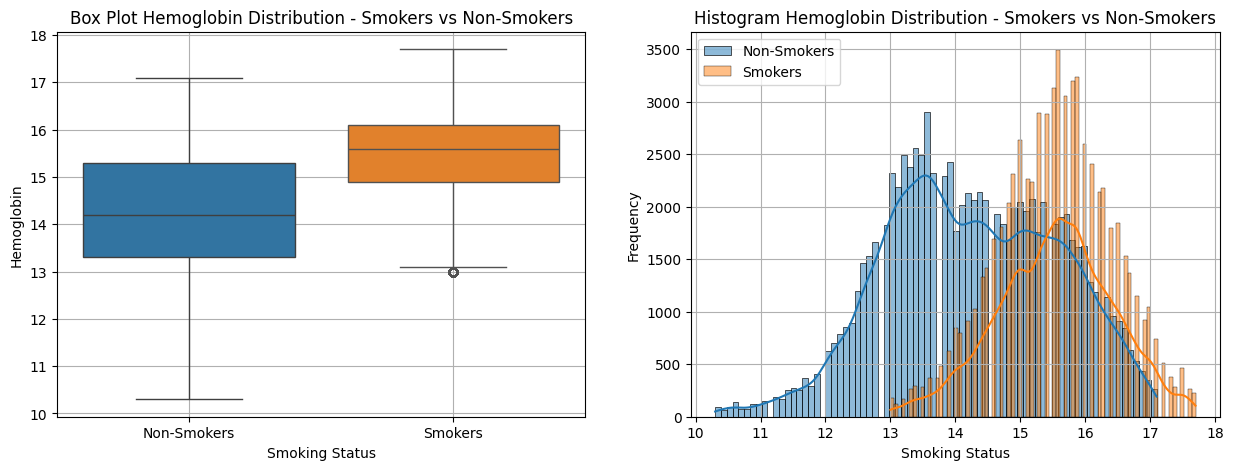

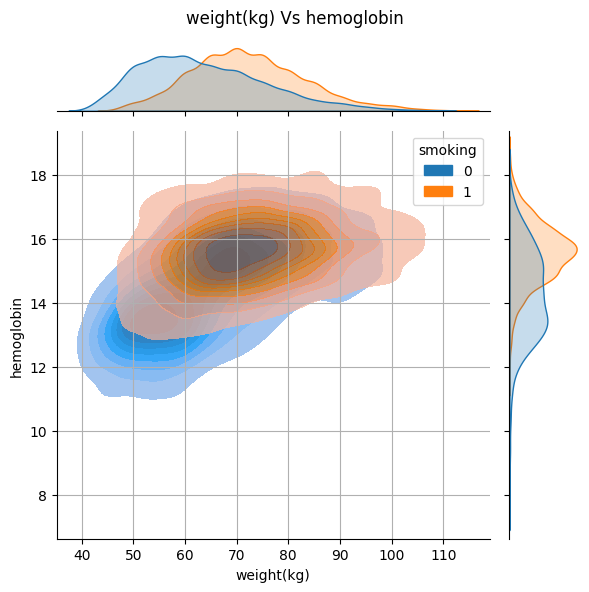

In [19]:
bg.single_feature_plot(non_smokers, smokers, 'smoking', 'hemoglobin', 'Hemoglobin Distribution - Smokers vs Non-Smokers',
                    'Smoking Status', 'Hemoglobin', [0, 1], ['Non-Smokers', 'Smokers'], True, 0.01, 0.99)
bg.joint_plots(smokers, non_smokers, 'weight(kg)',
                        'hemoglobin', 'smoking', 5000, True, 0.001, 0.999)

##### Fasting Blood Sugar

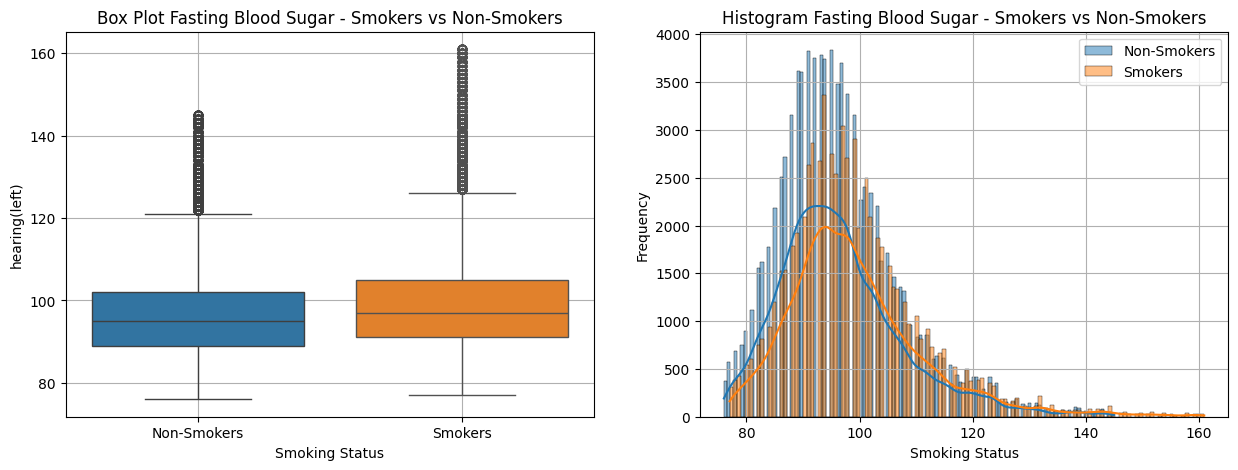

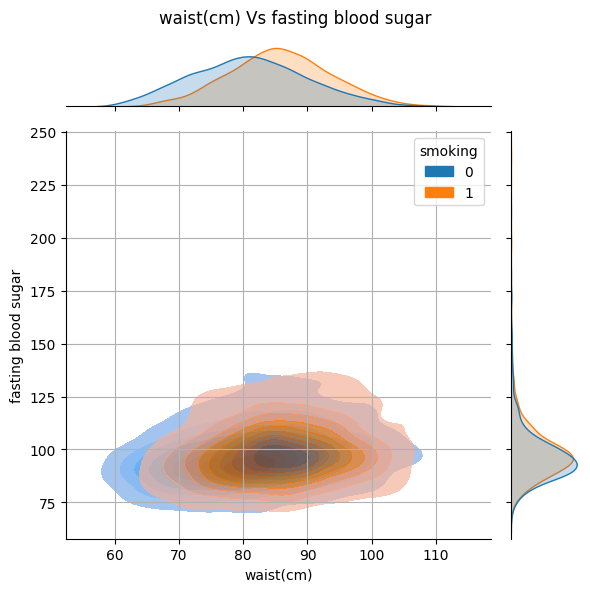

In [20]:
bg.single_feature_plot(non_smokers, smokers, 'smoking', 'fasting blood sugar', 'Fasting Blood Sugar - Smokers vs Non-Smokers',
                    'Smoking Status', 'hearing(left)', [0, 1], ['Non-Smokers', 'Smokers'], True, 0.01, 0.99)
bg.joint_plots(smokers, non_smokers, 'waist(cm)',
                        'fasting blood sugar', 'smoking', 4000, True, 0.001, 0.999)

#### Health Score

Given certain health metrics, a score is calculated on a 10 point scale. It can go negative, but a maximum value of 10.

How is it calculated? Using these ranges:

    healthy_ranges = {
        'hemoglobin': (13.5, 17.5, 12, 18.5),
        'serum creatinine': (0.5, 1.2, 0.2, 1.5),
        'AST': (0, 40),
        'ALT': (0, 44),
        'Gtp': (0, 60),
        'bmi': (18.5, 24.9, 17, 30),
        'fasting blood sugar': (70, 100, 60, 125),
        'LDL': (0, 100),
        'total_cholestrol': (0, 200),
        'triglyceride': (0, 150),
        'systolic': (90, 120, 80, 140),
        'relaxation': (60, 80, 50, 90)
    }

The items with 2 elements in value tuple have a lower and upper limit. These values may not have a value lower than the lower limit as lower limit is already 0. As for higher limit, we have considered the current limit as the higher limit. For items with 4 elements, there is a healthy range and a borderline range, with upper and lower limits in borderline ranges as well. For example: a healthy person should have fasting sugar in the range of 70-100 mg/dL, but for borderline cases, it can go as low as 60 mg/dL or as high as 125 mg/dL after which it becomes very concerning. [[CDC](https://www.cdc.gov/diabetes/basics/getting-tested.html)].

A metric and scoring system was built using this data with the formulae:

4 element tuple $(healthy\_lower\_limit, healthy\_upper\_limit, lower\_limit, upper\_limit)$:

$health\_score += max(\frac{max\_score * (value - healthy\_lower\_limit)}{healthy\_lower\_limit - lower\_limit}, \frac{max\_score * (healthy\_upper\_limit - value)}{healthy\_upper\_limit - upper\_limit})$

2 element tuple $(0, upper\_limit)$:

$health\_score += 1-\frac{value}{upper\_limit}$

As the lower limit is 0, using a healthy upper limit and upper limit would cause a lot of penalty if someone exceeds the values as (upper_limit - healthy upper limit) << (healthy upper limit - 0).

In [21]:
healthy_ranges = {
    'hemoglobin': (13.5, 17.5, 12, 18.5),
    'serum creatinine': (0.5, 1.2, 0.2, 1.5),
    'AST': (0, 40),
    'ALT': (0, 44),
    'Gtp': (0, 60),
    'bmi': (18.5, 24.9, 17, 30),
    'fasting blood sugar': (70, 100, 60, 110),
    'LDL': (0, 100),
    'total_cholesterol': (0, 200),
    'triglyceride': (0, 150),
    'systolic': (90, 120, 80, 140),
    'relaxation': (60, 80, 50, 90)
}

smokers_health_score = dp.health_score(smokers, healthy_ranges, 10)
non_smokers_health_score = dp.health_score(non_smokers, healthy_ranges, 10)

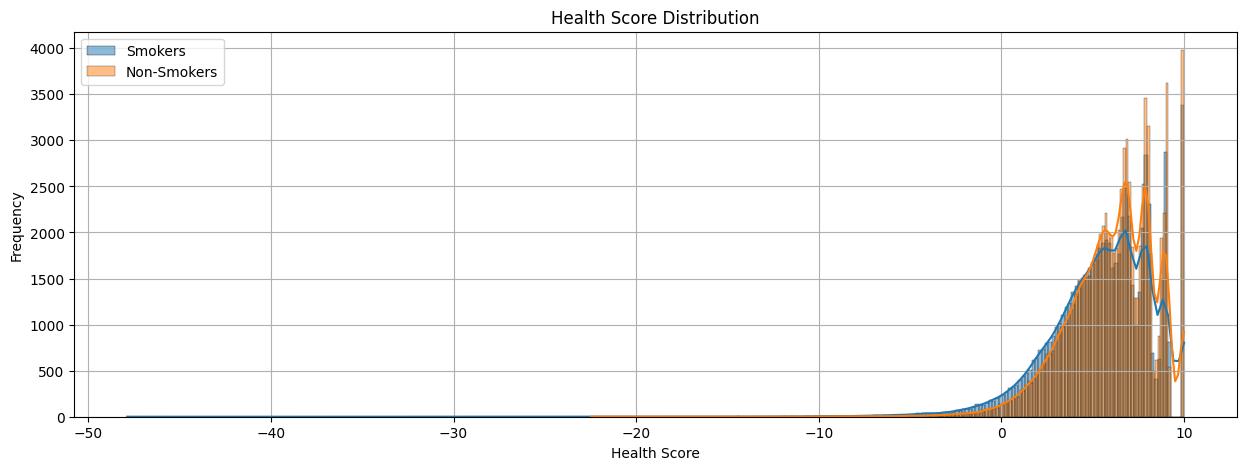

In [22]:
# plot the health score distribution
plt.figure(figsize=(15, 5))
sns.histplot(smokers_health_score['health_score'], kde=True, label='Smokers')
sns.histplot(
    non_smokers_health_score['health_score'], kde=True, label='Non-Smokers')
plt.grid(True)
plt.title('Health Score Distribution')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### Health score distribution above -2


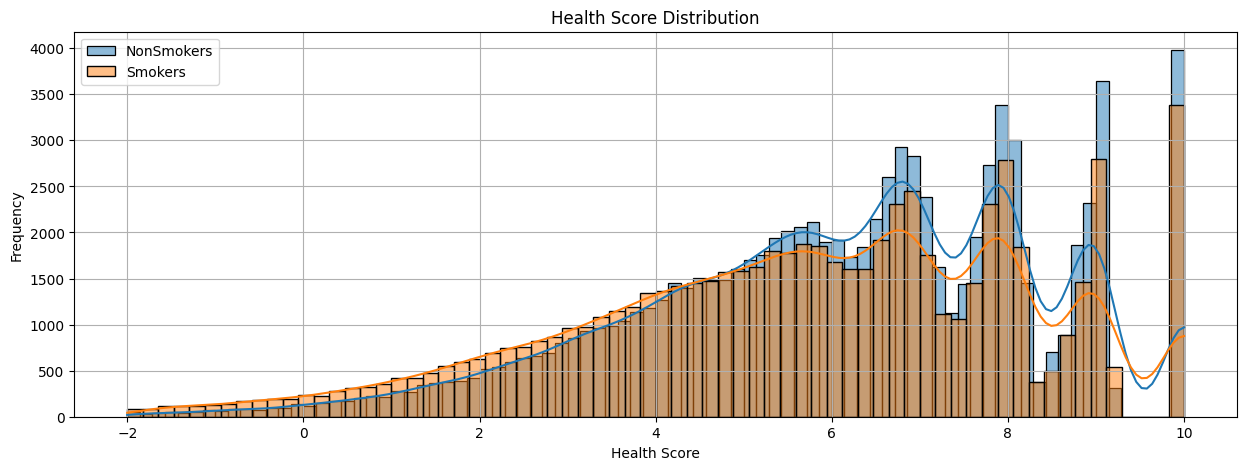

In [23]:
thresholded_smokers_health_score = smokers_health_score[smokers_health_score['health_score'] >= -2]
thresholded_non_smokers_health_score = non_smokers_health_score[
    non_smokers_health_score['health_score'] >= -2]
plt.figure(figsize=(15, 5))
sns.histplot(
    thresholded_non_smokers_health_score['health_score'], kde=True, label='NonSmokers')
sns.histplot(
    thresholded_smokers_health_score['health_score'], kde=True, label='Smokers')
plt.grid(True)
plt.title('Health Score Distribution')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### Health score distribution below -5

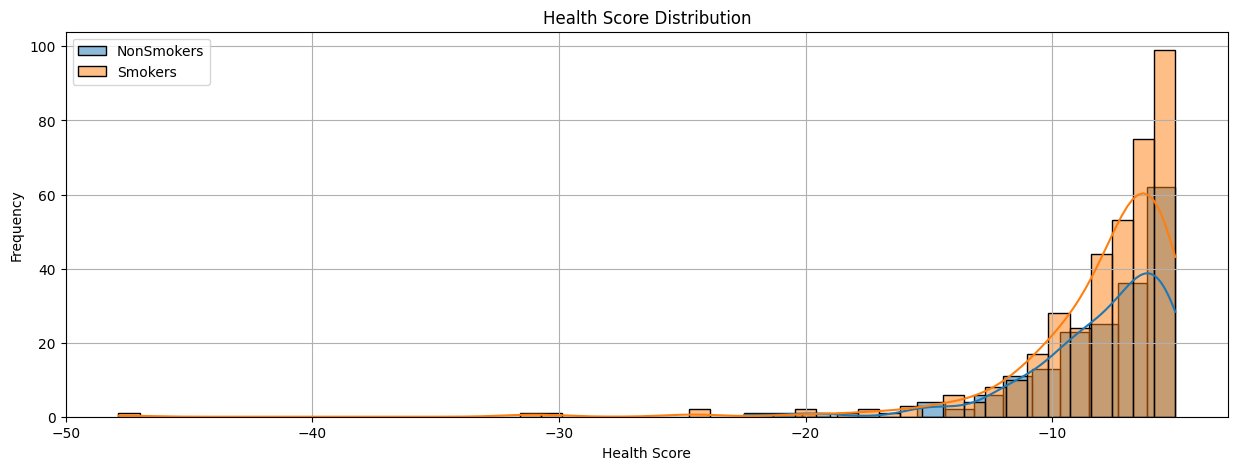

In [24]:
thresholded_smokers_health_score = smokers_health_score[smokers_health_score['health_score'] <= -5]
thresholded_non_smokers_health_score = non_smokers_health_score[
    non_smokers_health_score['health_score'] <= -5]
plt.figure(figsize=(15, 5))
sns.histplot(
    thresholded_non_smokers_health_score['health_score'], kde=True, label='NonSmokers')
sns.histplot(
    thresholded_smokers_health_score['health_score'], kde=True, label='Smokers')
plt.grid(True)
plt.title('Health Score Distribution')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [25]:
print('Smokers health score statistics')
print(smokers_health_score.describe()[
      'health_score'].to_string(), '\n')
print('Non-smokers health score statistics')
print(non_smokers_health_score.describe()['health_score'].to_string())

Smokers health score statistics
count    69653.000000
mean         5.512276
std          2.869420
min        -47.866136
25%          3.918525
50%          5.847222
75%          7.652778
max         10.000000 

Non-smokers health score statistics
count    89603.000000
mean         6.015028
std          2.446370
min        -22.487374
25%          4.575709
50%          6.341929
75%          7.833333
max         10.000000
